In [1]:
import keras
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cross_validation import train_test_split

Using TensorFlow backend.


In [2]:
TEST_SIZE = 0.1

In [3]:
X = np.load('out/X_train.npy')
y = np.load('out/y_train.npy')

In [5]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=TEST_SIZE, random_state=11)

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, LSTM, GRU
from keras.regularizers import l2, activity_l2
from keras.callbacks import ModelCheckpoint

In [24]:
model = Sequential([
    Dense(
        1024, 
        input_dim=X_train.shape[1], 
        activation='relu'
    ),
    Dropout(0.5),
    Dense(1024, activation='relu'),
    Dense(1, activation='linear')
])

model.compile(loss='mae', optimizer='RMSprop')

In [25]:
hist = model.fit(
        X_train,
        y_train,
        batch_size=32,
        nb_epoch=10, 
        validation_data=(X_test, y_test),
        callbacks = [
            ModelCheckpoint(
                "model-{epoch:03d}@l={loss:.5f},vl={val_loss:.5f}.h5",
                monitor='val_loss', 
                verbose=False, 
                save_best_only=False,
                mode='max'
            )
        ]
     )

Train on 169486 samples, validate on 18832 samples
Epoch 1/10
169486/169486 [==============================] - 15s - loss: 1248.2307 - val_loss: 1265.2006
Epoch 2/10
169486/169486 [==============================] - 15s - loss: 1204.9651 - val_loss: 1194.4703
Epoch 3/10
169486/169486 [==============================] - 15s - loss: 1192.4552 - val_loss: 1193.8722
Epoch 4/10
169486/169486 [==============================] - 15s - loss: 1186.5559 - val_loss: 1173.0318
Epoch 5/10
169486/169486 [==============================] - 15s - loss: 1180.2055 - val_loss: 1183.1989
Epoch 6/10
169486/169486 [==============================] - 15s - loss: 1176.2456 - val_loss: 1186.0451
Epoch 7/10
169486/169486 [==============================] - 15s - loss: 1173.2732 - val_loss: 1162.5448
Epoch 8/10
169486/169486 [==============================] - 15s - loss: 1168.8709 - val_loss: 1160.5877
Epoch 9/10
169486/169486 [==============================] - 15s - loss: 1166.2132 - val_loss: 1158.5624
Epoch 10/10
1

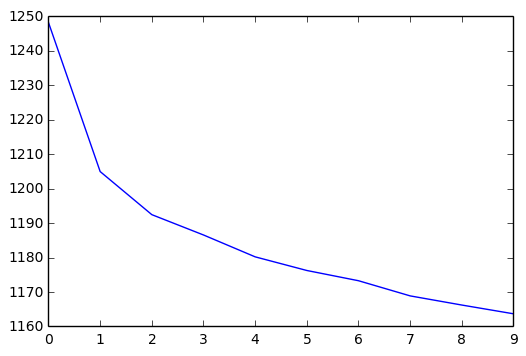

In [26]:
plt.plot(hist.history.values()[0])

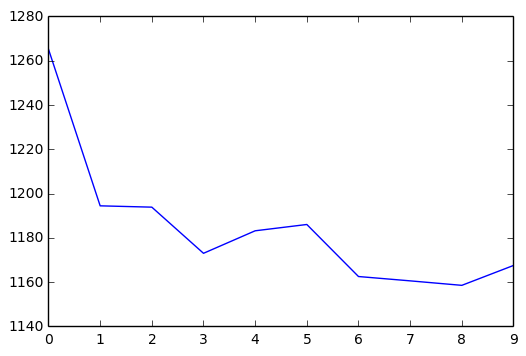

In [27]:
plt.plot(hist.history.values()[1])